FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/fairface-audit-kit/reports/figs/per_group_acc_box.png'

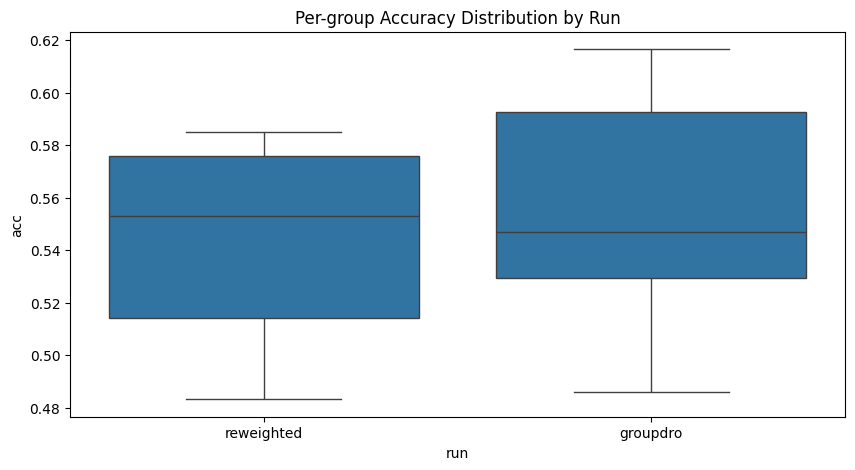

In [1]:
import json, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, os

def load_report(path):
    with open(path) as f: return json.load(f)

baseline = load_report("reports/baseline_report.json") if os.path.exists("reports/baseline_report.json") else None
reweighted = load_report("reports/reweighted_report.json")
groupdro   = load_report("reports/groupdro_report.json")

def tidy(report, name):
    rows=[]
    for k,v in report["per_group_acc"].items():
        r = int(k.split("|")[0][1:]); g = int(k.split("|")[1][1:])
        rows.append({"run": name, "race": r, "gender": g, "acc": v})
    return pd.DataFrame(rows)

dfs=[]
if baseline: dfs.append(tidy(baseline, "baseline"))
dfs.append(tidy(reweighted, "reweighted"))
dfs.append(tidy(groupdro, "groupdro"))
df = pd.concat(dfs, ignore_index=True)

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="run", y="acc")
plt.title("Per-group Accuracy Distribution by Run")
plt.savefig("reports/figs/per_group_acc_box.png", dpi=150); plt.show()

# Δgap table
def gap(rep): return rep["acc_gap"]
summary = pd.DataFrame({
    "run": ["baseline"]*(1 if baseline else 0) + ["reweighted", "groupdro"],
    "overall_acc": ([baseline["overall_acc"]] if baseline else []) + [reweighted["overall_acc"], groupdro["overall_acc"]],
    "worst_group_acc": ([baseline["per_group_acc"][baseline["worst_group"]]] if baseline else []) + [reweighted["per_group_acc"][reweighted["worst_group"]], groupdro["per_group_acc"][groupdro["worst_group"]]],
    "acc_gap": ([gap(baseline)] if baseline else []) + [gap(reweighted), gap(groupdro)]
})
summary.to_csv("reports/summary.csv", index=False)
summary
